In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
data_path = os.getcwd() + '/train.csv'
df = pd.read_csv(data_path)

raw_data = df.copy()

In [ ]:
df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [ ]:
print(f'Number of rows in the dataset: {df.shape[0]}')
print(f'Number of columns in the dataset {df.shape[1]}')

Number of rows in the dataset: 6019
Number of columns in the dataset 13


## Change Type of Values

First, we need to change the type of 'Mileage', 'Engine', 'Power', and 'New_Price' from the object values to float values. 

### Change type of values in 'Mileage'

Note that some values in 'Mileage' are given in 'km/kg' and the others in 'kmpl'. So, we need first to change the units of all values into 'kmpl'. Then, we change all the values to float.


In [ ]:
print('{} values are missed in Mileage'.format(df.Mileage.isna().sum()))

# Since 2 values are missed, we just fill appropriate values for them
df.Mileage.fillna('NaN kmpl', inplace=True )

df['Mileage_new'] = df.Mileage.str.split()
df['Mileage_val'] = df['Mileage_new'].apply(lambda x: float(x[0]))
df['Mileage_unit'] = df['Mileage_new'].apply(lambda x: x[1])

#Convert km/kg to kmpl, one need to divide the values by 1.37 approximately.
# 1 kg = 1.37 liter 
for ind, unit in enumerate(df['Mileage_unit'].to_list()):
    if unit=='km/kg':
        df.loc[ind, 'Mileage_val'] = df.loc[ind, 'Mileage_val'] / 1.37

2 values are missed in Mileage


### Change type of values in  'Engine'

Similarly, the values in 'Engine' also have to be changed to numerical values without the unit. In the follwing, this has been done.

In [ ]:
# Some values are missed in Engine, we just fill appropriate values for them
df.Engine.fillna('NaN cc', inplace=True )

df['Engine_new'] = df.Engine.str.split()
df['Engine_val'] = df['Engine_new'].apply(lambda x: float(x[0]))
df['Engine_unit'] = df['Engine_new'].apply(lambda x: x[1])

# Just to check all the units are the same
print('\nThe unit for all the values in Engine:')
df['Engine_unit'].value_counts()



The unit for all the values in Engine:


CC    5983
cc      36
Name: Engine_unit, dtype: int64

### Change type of values in  'Power'

The values in 'Power' also have to be changed to numerical values without the unit. In the follwing, this has been done.

In [ ]:
# Some values are missed in Power, we just fill appropriate values for them
df.Power.fillna('NaN bhp', inplace=True )

# Some values in Power are given as 'null bhp',
# we also replace them with 'NaN bhp '
df.Power.replace({'null bhp': 'NaN bhp'}, inplace=True)

df['Power_new'] = df.Power.str.split()
df['Power_val'] = df['Power_new'].apply(lambda x: float(x[0]))
df['Power_unit'] = df['Power_new'].apply(lambda x: x[1])

# Check all the units for values in power are bhp
print('\nThe unit for all the values in Power:')
df['Power_unit'].value_counts()


The unit for all the values in Power:


bhp    6019
Name: Power_unit, dtype: int64

### Change type of values in  'New_Price'

Similarly, the values in 'New_Price' also have to be changed to numerical values without the unit. In the follwing, this has been done.

Most of the values in New_Price are missed.

In [ ]:
print('{} values are missed in New_Price'.format(df.New_Price.isna().sum()))

# Some values are missed in Engine, we just fill appropriate values for them
df.New_Price.fillna('NaN Lakh', inplace=True )

df['New_Price_new'] = df.New_Price.str.split()
df['New_Price_val'] = df['New_Price_new'].apply(lambda x: float(x[0]))
df['New_Price_unit'] = df['New_Price_new'].apply(lambda x: x[1])

#Convert Cr to Lakh, one need to multiply the values by 100
# 1 Cr = 100 Lakh 
for ind, unit in enumerate(df['New_Price_unit'].to_list()):
    if unit=='Cr':
        df.loc[ind, 'New_Price_val'] = df.loc[ind, 'New_Price_val'] * 100

5195 values are missed in New_Price


###  Remove auxiliary columns

In the last three subsections, we add auxiliary variables to our dataframe; now, it is time to remove them. 

In [ ]:
# The auxiliry columns related to 'Mileage'
df.drop(columns=['Mileage_unit', 'Mileage', 'Mileage_new'], inplace=True)
df.rename(columns={'Mileage_val':'Mileage'}, inplace=True)

# The auxiliary columns related to 'Engine'
df.drop(columns=['Engine_unit', 'Engine', 'Engine_new'], inplace=True)
df.rename(columns={'Engine_val':'Engine'}, inplace=True)

# The auxiliary columns related to 'Power'
df.drop(columns=['Power_unit', 'Power', 'Power_new'], inplace=True)
df.rename(columns={'Power_val':'Power'}, inplace=True)

# The auxiliary columns related to 'New_Price'
df.drop(columns=['New_Price_unit', 'New_Price', 'New_Price_new'], inplace=True)
df.rename(columns={'New_Price_val':'New_Price'}, inplace=True)

Now, lets have a look at our dataframe:

In [ ]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage,Engine,Power,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,19.416058,998.0,58.16,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.670000,1582.0,126.20,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.200000,1199.0,88.70,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.770000,1248.0,88.76,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.200000,1968.0,140.80,NaN


## Missing Values

As we mentioned earlier, some values in the features are missed. In this section we will take care of those values. Lets have a look on the missed values:

In [ ]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  42
Price                   0
Mileage                 2
Engine                 36
Power                 143
New_Price            5195
dtype: int64

First, lets have a look at the descriptive statistics of our dataset.

In [ ]:
tab_des = df.describe().round(2)
tab_des

,Year,Kilometers_Driven,Seats,Price,Mileage,Engine,Power,New_Price
count,6019.00,6019.00,5977.00,6019.00,6017.00,5983.00,5876.00,824.00
mean,2013.36,58738.38,5.28,9.48,18.06,1621.28,113.25,23.08
std,3.27,91268.84,0.81,11.19,4.51,601.36,53.87,26.18
min,1998.00,171.00,0.00,0.44,0.00,72.00,34.20,3.91
25%,2011.00,34000.00,5.00,3.50,15.10,1198.00,75.00,7.98
50%,2014.00,53000.00,5.00,5.64,18.12,1493.00,97.70,11.67
75%,2016.00,73000.00,5.00,9.95,21.02,1984.00,138.10,26.56
max,2019.00,6500000.00,10.00,160.00,28.40,5998.00,560.00,230.00


Obviousely, there exist missing values in 'Seats', 'Mileage', 'Engine', 'Power', and 'New_Price'.

For the 'New_Price', so many values are missed; therefore, we just leave the missesd values as NaN in our dataset for the moment. However, we will take care of the others in the subsequent sections.



Now, lets have a look at the correlation between the different columns in our dataset.

In [ ]:
tab_corr = df.corr()
tab_corr

,Year,Kilometers_Driven,Seats,Price,Mileage,Engine,Power,New_Price
Year,1.000000,-0.173048,0.012333,0.305327,0.325294,-0.052197,0.014525,-0.021416
Kilometers_Driven,-0.173048,1.000000,0.083113,-0.011493,-0.065849,0.091068,0.033503,-0.007747
Seats,0.012333,0.083113,1.000000,0.052225,-0.306928,0.393337,0.101562,-0.009656
Price,0.305327,-0.011493,0.052225,1.000000,-0.302531,0.658354,0.772566,0.871847
Mileage,0.325294,-0.065849,-0.306928,-0.302531,1.000000,-0.591722,-0.530766,-0.379056
Engine,-0.052197,0.091068,0.393337,0.658354,-0.591722,1.000000,0.866185,0.723043
Power,0.014525,0.033503,0.101562,0.772566,-0.530766,0.866185,1.000000,0.870952
New_Price,-0.021416,-0.007747,-0.009656,0.871847,-0.379056,0.723043,0.870952,1.000000


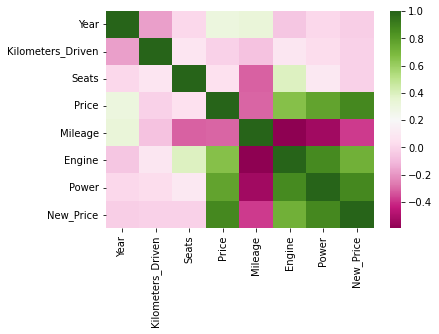

In [ ]:
sns.heatmap(tab_corr, cmap="PiYG")

### Fill missed values for 'Mileage'

Based on the above heatmap diagram, it is obvious that the 'Mileage' has significant correlation with 'Power' and 'Engine'. However, one of the missed values in 'Mileage' dose not have a value for 'Engine'; therefore, we use 'Power' to come up with approprite values for the missed values in Mileage. 

We catagorized the data based on 'Power'; then we comute the mean of Mileage for each category of 'Power'; subsequently, we replace the missed values in the Mileage using the  'Mileage' mean value of 'Power' categories. 

In [ ]:
bins_Power = tab_des.Power[['min','25%', '50%', '75%', 'max']]
df['Power_types']  = pd.cut(df.Power, bins=bins_Power, labels=['P1', 'P2', 'P3', 'P4'])
 
Mileage_mean_ver_Power_type = df.groupby('Power_types').Mileage.mean()

Missed_Mileage_values = Mileage_mean_ver_Power_type[ df.Power_types[df['Mileage'].isna()] ].values
df.Mileage[df['Mileage'].isna()] = Missed_Mileage_values

## Fill missed values for 'Engine'

Note that the 'Engine' values have significant correlation with 'Price', 'New_Price', and 'Power'. To fill the missed values for 'Engine', we will take into account the related correlation with 'Price' since for those values missed in 'Engine' the related values of 'Power' are also missed. On the other hand, most of the values in 'New_Price' are also missed , so 'New_Price' is not suitable to compute the missed values for 'Engine'.

In [ ]:
print('{} values are missed in Engine'.format(df.Engine.isna().sum()))

bins_Price = tab_des.Price[['min','25%', '50%', '75%', 'max']]
df['Price_types']  = pd.cut(df.Price, bins=bins_Price, labels=['Pr1', 'Pr2', 'Pr3', 'Pr4'])

Engine_mean_ver_Price_type = df.groupby('Price_types').Engine.mean()

Missed_Engine_values = Engine_mean_ver_Price_type[ df.Price_types[df['Engine'].isna()] ].values
df.Engine[df['Engine'].isna()] = Missed_Engine_values

36 values are missed in Engine


## Fill missed values for 'Power'

Similar to the previous sections, one can come up with appropriate values for missed values of 'Power'

In [ ]:
print('{} values are missed in Power'.format(df.Power.isna().sum()))
Power_mean_ver_Price_type = df.groupby('Price_types').Power.mean()

Missed_Power_values = Power_mean_ver_Price_type[ df.Price_types[df['Power'].isna()] ].values
df.Power[df['Power'].isna()] = Missed_Power_values

143 values are missed in Power


### Missed values in categorical features

One can see below, that there exist no any missed values in categorical features.

In [ ]:
df.describe(include=object)

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,6019,6019,6019,6019,6019
unique,1876,11,5,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,49,790,3205,4299,4929


## Drop Irrelevant Features 

Note that the ultimate goal is to use this dataset to predict the used-car prices. As one can see below the correlation between the price with 'Kilometers_Driven' and 'Seats' is very low. therefore, we can ignore theses features. 

In [ ]:
features = df.corr().Price.sort_values()
features

Mileage             -0.302444
Kilometers_Driven   -0.011493
Seats                0.052225
Year                 0.305327
Engine               0.659039
Power                0.774248
New_Price            0.871847
Price                1.000000
Name: Price, dtype: float64

Text(0.5, 1.0, "Correlation between 'Price' and the other columns")

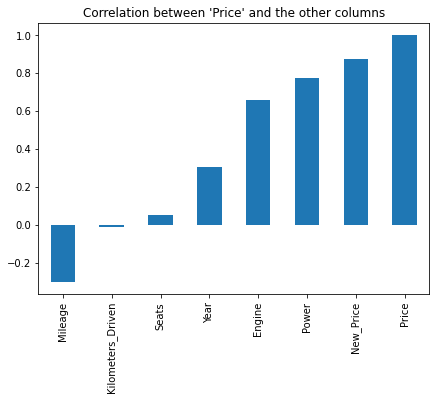

In [ ]:
features.plot(kind='bar', figsize=(7,5))
plt.title("Correlation between 'Price' and the other columns")

As one can see, the correlation between 'Price' with 'Seats' and 'Kilometers_Driven' is low, so we ignore 'Seat' and 'Kilometers_Driven' as the ultimate features. 

In [ ]:
df.drop(columns=['Seats', 'Kilometers_Driven'], inplace=True)
df.head()

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Price,Mileage,Engine,Power,New_Price,Power_types,Price_types
0,Maruti Wagon R LXI CNG,Mumbai,2010,CNG,Manual,First,1.75,19.416058,998.0,58.16,NaN,P1,Pr1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,Diesel,Manual,First,12.50,19.670000,1582.0,126.20,NaN,P3,Pr4
2,Honda Jazz V,Chennai,2011,Petrol,Manual,First,4.50,18.200000,1199.0,88.70,8.61,P2,Pr2
3,Maruti Ertiga VDI,Chennai,2012,Diesel,Manual,First,6.00,20.770000,1248.0,88.76,NaN,P2,Pr3
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,Diesel,Automatic,Second,17.74,15.200000,1968.0,140.80,NaN,P4,Pr4


## Delete Outliers

In the following, we will consider getting rid of outliers. Lets, first, have a look at the features 'Engine', 'Power', 'Mileage', and 'New_Price', using boxplot.

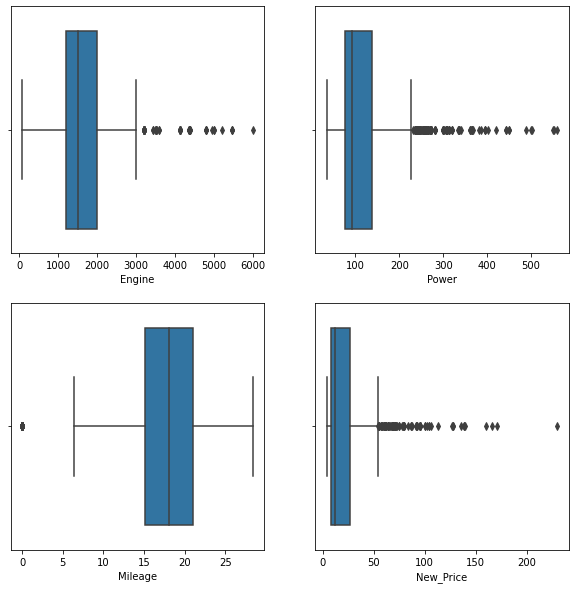

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
#sns.regplot(x='Engine', y='Price', ax=ax1, data=df)
sns.boxplot(x='Engine', ax=ax1, data=df)
sns.boxplot(x='Power',  ax=ax2, data=df)
sns.boxplot(x='Mileage', ax=ax3, data=df)
sns.boxplot(x='New_Price',  ax=ax4, data=df)

As one can see, there exist some outliers. To delete the outliers we consider plotting the data and a realted linear regression fit using the regplopt from Seaborn library.

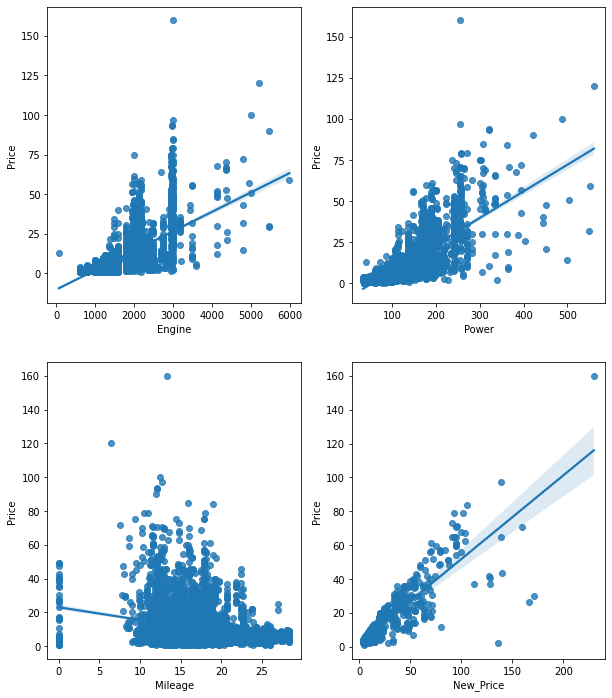

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))
sns.regplot(x='Engine', y='Price', data=df, ax=ax1)
sns.regplot(x='Power', y='Price', data=df, ax=ax2)
sns.regplot(x='Mileage', y='Price', data=df, ax=ax3)
sns.regplot(x='New_Price', y='Price', data=df, ax=ax4)

Obviousely, the Price values above 80 can be considered as outliers. So, we drop those values from our dataset. One may also want to delete more possible outliers considering a lower limit.

In [ ]:
df = df[df.Price<80]
df.reset_index(inplace=True)

Also note that, some values for 'Mileage' are zero (which are outliers). We just replace those values with the mean value of the Mileage.

In [ ]:
df.Mileage[df['Mileage']==0] = df.Mileage.mean()

## Categorical Features

Lets first have a look at the cateegorical; features in the dataset:

In [ ]:
df.select_dtypes('object')

,Name,Location,Fuel_Type,Transmission,Owner_Type
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First
2,Honda Jazz V,Chennai,Petrol,Manual,First
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second
...,...,...,...,...,...
6005,Maruti Swift VDI,Delhi,Diesel,Manual,First
6006,Hyundai Xcent 1.1 CRDi S,Jaipur,Diesel,Manual,First
6007,Mahindra Xylo D4 BSIV,Jaipur,Diesel,Manual,Second
6008,Maruti Wagon R VXI,Kolkata,Petrol,Manual,First


Now, using boxplot, let us have a look at some categorical features: 

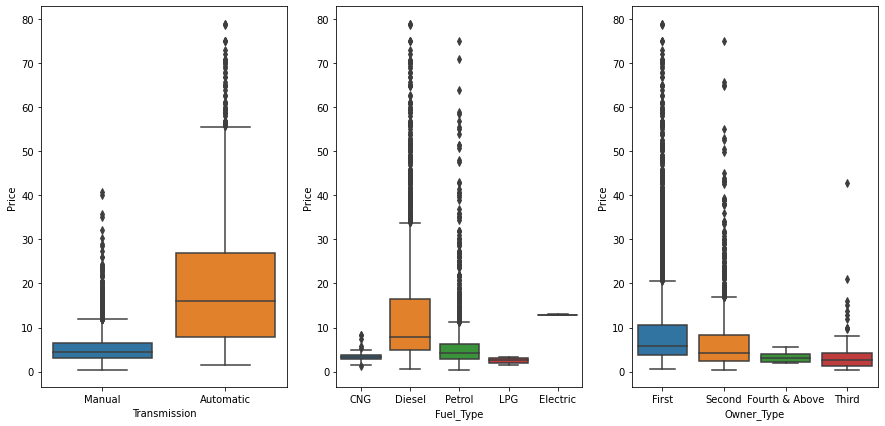

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,7))
sns.boxplot(x='Transmission', y='Price', data=df, ax=ax1)
sns.boxplot(x='Fuel_Type', y='Price', data=df, ax=ax2)
sns.boxplot(x='Owner_Type', y='Price', data=df, ax=ax3)

It is worth mentioning that: 
- The price values are drastically different based on different types of 'Trnasmission'. 
- The price values for 'LPG' and 'CNG' are not significantly different.
- The price values for the 'Third' and the 'Fourth and above' types of 'Owner_Type' are not significantly different.

Therefore, we can reduce the number of types in the 'Fuel_Type' adnd 'Owner_Type' as follows:


In [ ]:
df.Fuel_Type.replace({'CNG':'CNG/LPG', 'LPG':'CNG/LPG'}, inplace=True)
df.Fuel_Type.value_counts()

Diesel      3202
Petrol      2740
CNG/LPG       66
Electric       2
Name: Fuel_Type, dtype: int64

In [ ]:
df.Owner_Type.replace({'Fourth & Above':'Third & Above', 'Third':'Third & Above'}, inplace=True)
df.Owner_Type.value_counts()

First            4922
Second            967
Third & Above     121
Name: Owner_Type, dtype: int64

After merging the types mentioned erlier, we obtain the following features:

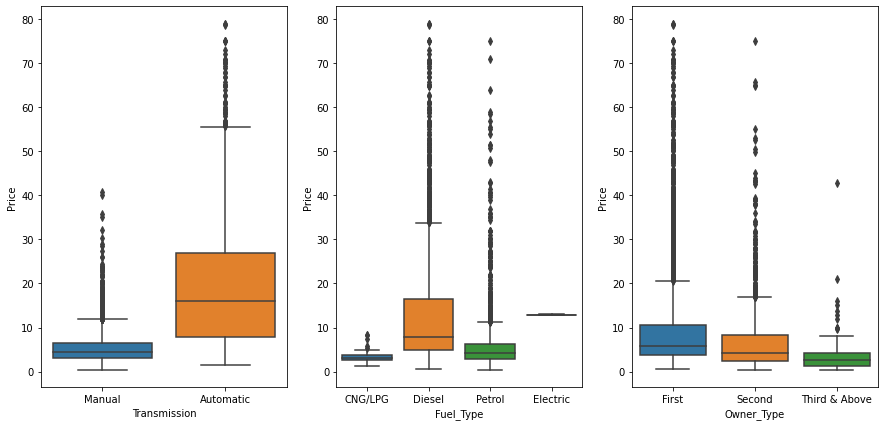

In [ ]:
ig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,7))
sns.boxplot(x='Transmission', y='Price', data=df, ax=ax1)
sns.boxplot(x='Fuel_Type', y='Price', data=df, ax=ax2)
sns.boxplot(x='Owner_Type', y='Price', data=df, ax=ax3)

### Is 'Transmission' a relavant feature to be considered for the 'Price' prediction?

As we mentioned earlier, based on the previous box-and-whisker plot, 'Tramnsmission' is a suitable feature to be used for the price prediction. This can also be assessed by one-way ANOVA test, as follows:

In [ ]:
df_Manual = df.groupby('Transmission').get_group('Manual')['Price']
df_Automatic = df.groupby('Transmission').get_group('Automatic')['Price']

stats.f_oneway(df_Manual, df_Automatic)

F_onewayResult(statistic=3403.28406123744, pvalue=0.0)

As it was expected, since the p-value is so small, the null hypothesis that the price is independent of the transmission types is rejected.

### Is 'Fuel-Type' a relavant feature to be considered for the 'Price' prediction?

In order to evaluate whether the 'Fuel_Type' is a suitable feature for predicting the price, we will use statustical test as follows: 

In [ ]:
df_CNGLPG = df.groupby('Fuel_Type').get_group('CNG/LPG')['Price']
df_Diesel = df.groupby('Fuel_Type').get_group('Diesel')['Price']
df_Petrol = df.groupby('Fuel_Type').get_group('Petrol')['Price']
df_Electric = df.groupby('Fuel_Type').get_group('Electric')['Price']

stats.f_oneway(df_CNGLPG, df_Diesel, df_Petrol, df_Electric)

F_onewayResult(statistic=270.7653603681327, pvalue=7.815967150501097e-165)

Obviousely, due to an infinitesimal p-value (7.81e-165) which is less than 0.05, we would reject the null hypothesis. This implies that we have sufficient proof to say that there exists a difference in the 'Price' among four different types of fuel.  

Just for a further investigation, we will use the categories of price to  carry out Chi-Square test. However, it is not necessary at all. 

In [ ]:
df_PriFue = df.groupby(['Price_types','Fuel_Type'], as_index=False).Price.count()
obs_PriFue = df_PriFue.pivot(index='Price_types', columns='Fuel_Type')
obs_PriFue

Price                       
Fuel_Type   CNG/LPG Diesel Electric Petrol
Price_types                               
Pr1              45    398        0   1122
Pr2              17    635        0    796
Pr3               4    917        0    580
Pr4               0   1252        2    241

In [ ]:
stats.chi2_contingency(obs_PriFue, correction=True)

(1169.1553120671474,
 5.521496200959811e-246,
 9,
 array([[1.71892162e+01, 8.33937427e+02, 5.20885339e-01, 7.13352471e+02],
        [1.59041438e+01, 7.71591945e+02, 4.81943751e-01, 6.60021967e+02],
        [1.64862706e+01, 7.99833916e+02, 4.99583957e-01, 6.84180230e+02],
        [1.64203694e+01, 7.96636712e+02, 4.97586953e-01, 6.81445332e+02]]))

As it is expected, Since the p-value (5.52e-246) is infinitesimal, the null hypothesis assuming the two variables are independent is rejected, which implies that 'Fuel-Type' and 'Price-types' and therefore 'Price' are dependent. Thus, 'Fuel-type' would be a suitable feature to predict the 'Price'. 

### Is 'Owner-Type' a relavant feature to be considered for the 'Price' prediction?

In order to evaluate whether the 'Owner_Type' is a suitable feature for predicting the price, we will use statustical test as follows: 

In [ ]:
df_First = df.groupby('Owner_Type').get_group('First')['Price']
df_Second = df.groupby('Owner_Type').get_group('Second')['Price']
df_Third_and_above = df.groupby('Owner_Type').get_group('Third & Above')['Price']


stats.f_oneway(df_First, df_Second, df_Third_and_above)

F_onewayResult(statistic=36.05992312421993, pvalue=2.7079404088559613e-16)

Obviousely, due to an infinitesimal p-value (2.70e-16) which is less than 0.05, we would reject the null hypothesis. This implies that we have sufficient proof to say that there exists a difference in the 'Price' among three different owner types. 

Similarly as before, we can use the categories of price to  carry out Chi-Square test just to assess it in another way. 

In [ ]:
df_PriOwn= df.groupby(['Price_types','Owner_Type'], as_index=False).Price.count()
obs_PriOwn = df_PriOwn.pivot(index='Price_types', columns='Owner_Type')
obs_PriOwn

Price                     
Owner_Type  First Second Third & Above
Price_types                           
Pr1          1068    415            82
Pr2          1244    185            19
Pr3          1331    160            10
Pr4          1279    206            10

In [ ]:
stats.chi2_contingency(obs_PriOwn, correction=True)

(308.9483554274004,
 9.8860210339114e-64,
 6,
 array([[1281.89881844,  251.58761857,   31.51356299],
        [1186.06357131,  232.77883175,   29.15759694],
        [1229.47611915,  241.29905142,   30.22482942],
        [1224.5614911 ,  240.33449825,   30.10401065]]))

Since the p-value (9.88e-64) is infinitesimal, the null hypothesis assuming the two variables are independent is rejected, which implies that 'Owner-Type' and 'Price-types' and therefore 'Price' are dependent. Thus, 'Owner-type' would be a suitable feature to predict the 'Price'. 

### Is 'Location' a relevant feature to be considered for the 'Price' prediction?

As before, we use again statistical tests to assess whether the price would be different in different locations.

In [ ]:
location_list = df.Location.unique()
samp = []
for loc in location_list:
    dataframe = 'df_' + loc
    dataframe = df.groupby('Location').get_group(loc)['Price']
    samp.append(dataframe)

stats.f_oneway(samp[0], samp[1], samp[2], samp[3], samp[4], samp[5], samp[6], samp[7], samp[8], samp[9],
              samp[10])

F_onewayResult(statistic=41.96488567605447, pvalue=5.24725860389052e-81)

Due to a small value for p-value which is less than 0.05, we can concluse the price and the location are not independent.
Similarly, we can also perform the Chi-Square test to assess it in another way.

In [ ]:
df_PriLoc= df.groupby(['Price_types','Location'], as_index=False).Price.count()
obs_PriLoc = df_PriLoc.pivot(index='Price_types', columns='Location')
obs_PriLoc

Price                                                      \
Location    Ahmedabad Bangalore Chennai Coimbatore Delhi Hyderabad Jaipur   
Price_types                                                                 
Pr1                48        57     181         42   133       185    163   
Pr2                56        83     115        112   149       168    113   
Pr3                60        83     104        219   113       202     84   
Pr4                59       133      94        261   158       185     53   

                                       
Location    Kochi Kolkata Mumbai Pune  
Price_types                            
Pr1            71     255    178  252  
Pr2           164     138    199  151  
Pr3           228      88    211  109  
Pr4           187      54    202  109

In [ ]:
stats.chi2_contingency(obs_PriLoc, correction=True)

(664.451860859204,
 1.2428279224851626e-120,
 30,
 array([[ 58.07871526,  92.71759028, 128.65867865, 165.12065235,
         144.02479614, 192.7275753 , 107.56282243, 169.28773506,
         139.33682809, 205.74970877, 161.73489765],
        [ 53.73672824,  85.78598769, 119.04010651, 152.77616908,
         133.25744716, 178.31918788,  99.52138459, 156.63171909,
         128.9199534 , 190.36778166, 149.6435347 ],
        [ 55.70361125,  88.92594442, 123.39723748, 158.36811449,
         138.13496422, 184.84606424, 103.1640872 , 162.36478615,
         133.6387086 , 197.33566317, 155.12081877],
        [ 55.48094525,  88.57047762, 122.90397737, 157.73506407,
         137.58279248, 184.10717257, 102.75170577, 161.71575969,
         133.1045099 , 196.5468464 , 154.50074888]]))

Since the p-value (1.24e-120) is infinitesimal, the null hypothesis assuming the two variables are independent is rejected, which implies that 'Location' and 'Price-types' and therefore 'Price' are dependent. Thus, 'Location' would be a suitable feature to predict the 'Price'. 

### Is 'Year' a relavant feature to be considered for the 'Price' prediction?

In [ ]:
df_PriYea= df.groupby(['Price_types','Year'], as_index=False).Price.count()
obs_PriYea = df_PriYea.pivot(index='Price_types', columns='Year')
obs_PriYea

Price                                               ...            \
Year         1998 1999 2000 2001 2002 2003 2004 2005 2006 2007  ... 2010 2011   
Price_types                                                     ...             
Pr1             3    2    4    7   14   15   28   50   65   93  ...  210  201   
Pr2             1    0    0    1    1    0    2    5    5   16  ...   46  114   
Pr3             0    0    0    0    0    1    1    0    4   10  ...   30   58   
Pr4             0    0    0    0    0    1    0    2    4    6  ...   56   91   

                                                     
Year        2012 2013 2014 2015 2016 2017 2018 2019  
Price_types                                          
Pr1          185  145  117   72   76   32    6    2  
Pr2          174  225  263  238  156  103   38   10  
Pr3          102  123  212  218  290  238  136   34  
Pr4          119  156  204  214  219  212  117   54  

[4 rows x 22 columns]

In [ ]:
stats.chi2_contingency(obs_PriYea, correction=True)

(1981.6000765468725,
 0.0,
 63,
 array([[  1.04177068,   0.52088534,   1.04177068,   2.08354135,
           3.90664004,   4.42752538,   8.07372275,  14.84523215,
          20.31452821,  32.55533367,  45.31702446,  51.56764853,
          89.07139291, 120.84539857, 151.05674821, 169.02729239,
         207.31236479, 193.24846064, 192.98801797, 152.35896156,
          77.35147279,  26.04426693],
        [  0.9638875 ,   0.48194375,   0.9638875 ,   1.927775  ,
           3.61457813,   4.09652188,   7.47012814,  13.7353969 ,
          18.79580629,  30.12148444,  41.92910634,  47.71243135,
          82.41238143, 111.81095024, 139.7636878 , 156.39074721,
         191.81361291, 178.80113164, 178.56015976, 140.96854718,
          71.56864703,  24.09718755],
        [  0.99916791,   0.49958396,   0.99916791,   1.99833583,
           3.74687968,   4.24646364,   7.74355134,  14.23814279,
          19.48377434,  31.22399734,  43.46380429,  49.45881178,
          85.42885671, 115.90347812, 144.879347

Since the p-value (0.0) is infinitesimal, the null hypothesis assuming the two variables are independent is rejected, which implies that 'Year' and 'Price-types' and therefore 'Price' are dependent. Thus, 'Year' would be a suitable feature to predict the 'Price'.

Now, to investigate further, let us depict the 'Price' versus 'Year' for the top 5 most pervasive cars in our dataset.

<AxesSubplot:xlabel='Year', ylabel='Price'>

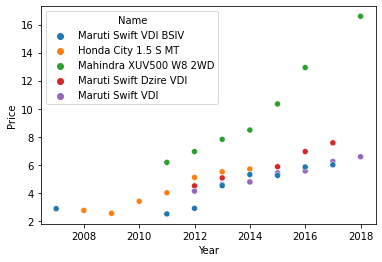

In [ ]:
Name_sorted = df['Name'].value_counts().sort_values(ascending=False)
Name_list = Name_sorted[:5].index.tolist()
df_YeaPri = df[df['Name'].isin(Name_list)][['Name', 'Year' ,'Price']]
df_YeaPri = df_YeaPri.groupby(['Year', 'Name']).mean().reset_index()
df_YeaPri
sns.scatterplot(x='Year', y='Price', hue='Name', data=df_YeaPri)

As one can see, the price for each of the 5 considered car increases when the year increases, as it is expected.  

### Price versus Location and Name

Lets also have a look at the price distribution with respect to the car brands in different locations:

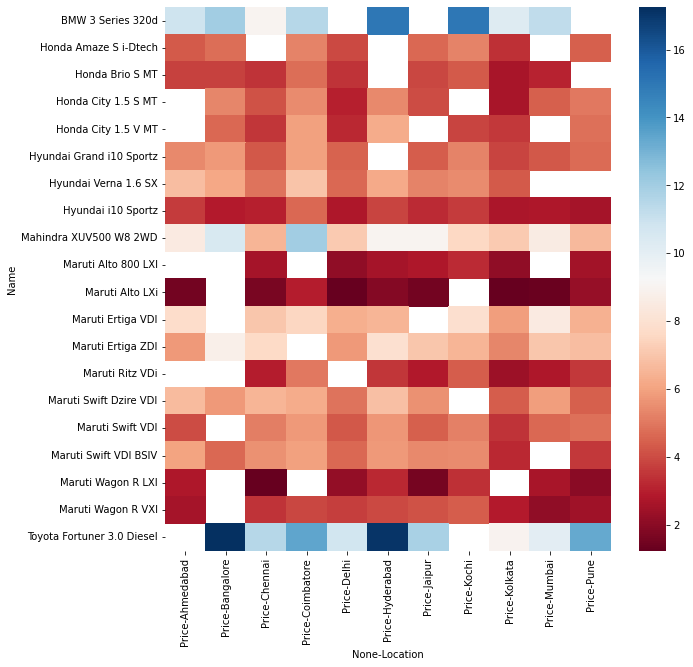

In [ ]:
vc = df.Name.value_counts()
Name_list = vc[:20].index.tolist()

df_LocNamPri = df[['Location', 'Name', 'Price']]
df_grp_LocNamPri = df_LocNamPri.groupby(['Location','Name'], as_index=False).mean()
df_grp_LocNamPri.sort_values('Price', inplace=True)
df_sample = df_grp_LocNamPri[df_grp_LocNamPri['Name'].isin(Name_list)]
pv_tab = df_sample.pivot(index='Name', columns='Location')
plt.figure(figsize=(10,10))
sns.heatmap(pv_tab, cmap='RdBu')

In what follows, you can see the distribution of our data with respct to 'Tranmission', 'Owner_Type', 'Fuel_Type', 'Location', and 'Year', represented by histograms.

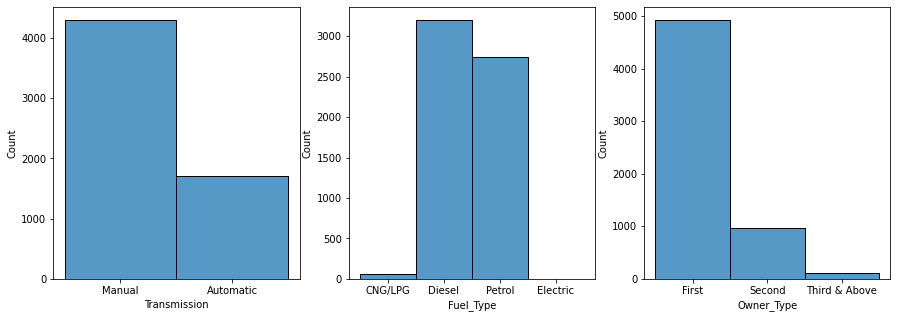

In [ ]:
ig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.histplot(x='Transmission', data=df, ax=ax1)
sns.histplot(x='Fuel_Type', data=df, ax=ax2)
sns.histplot(x='Owner_Type', data=df, ax=ax3)

In what follows, you can see the histograms of 'Year' and 'Location':

<AxesSubplot:xlabel='Count', ylabel='Location'>

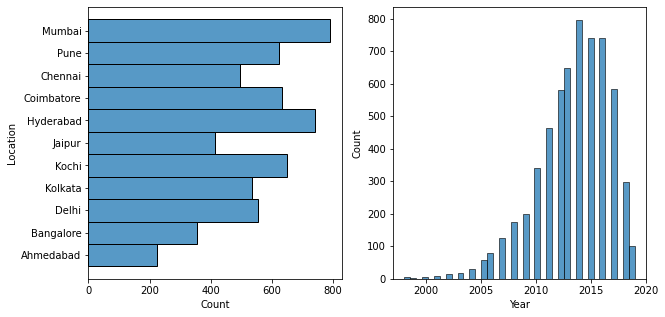

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.histplot(x='Year', data=df, ax=ax2 )
sns.histplot(y='Location', data=df, ax=ax1)

Also, you can see the top 50 most pervasive cars in our dataset: 

<AxesSubplot:xlabel='Count', ylabel='Name'>

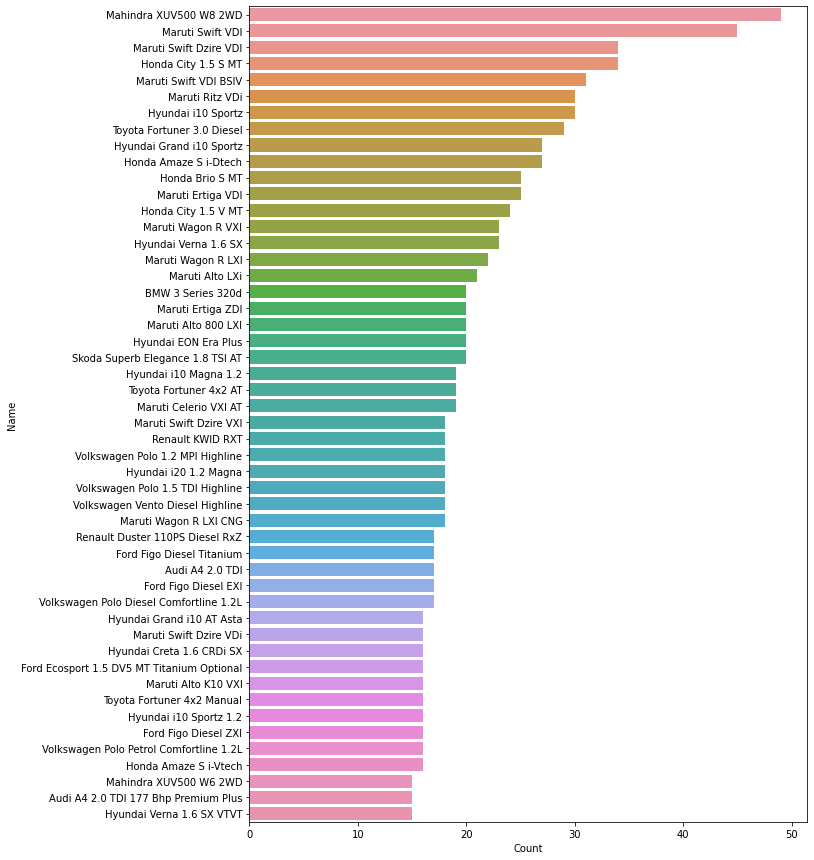

In [ ]:
df_temp = df['Name'].value_counts().to_frame().reset_index()[:50]
df_temp.rename({'index':'Name', 'Name':'Count'}, axis=1, inplace=True)
fig = plt.figure(figsize=(10,15))
sns.barplot(y='Name', x='Count', data=df_temp)

## Variable Transformation

Note that more reliable predictions are made using a linear model if the features and the target variable are normally distributed. Thereforte, we sometimes need to transform the data to end up with a normally distributed data. 

Lets, first, drop the unnecessary columns from the dataset:

In [ ]:
df.drop(['New_Price', 'Power_types', 'Price_types', 'New_Price'], axis=1, inplace=True)

Now, let compute the skew for the columns of the dataset:

In [ ]:
df[['Price', 'Mileage', 'Engine', 'Power']].skew()

Price      2.775903
Mileage    0.131010
Engine     1.363609
Power      1.822689
dtype: float64

Lets have a look at the features before applying the transformation:

We consider a limit of 0.5 for the skew; therfore, we will apply transformation on those columns with skew greater than 0.5 or less than -0.5.

The distribution of 'Price', 'Engine', and 'Power' values before applying the transformation:

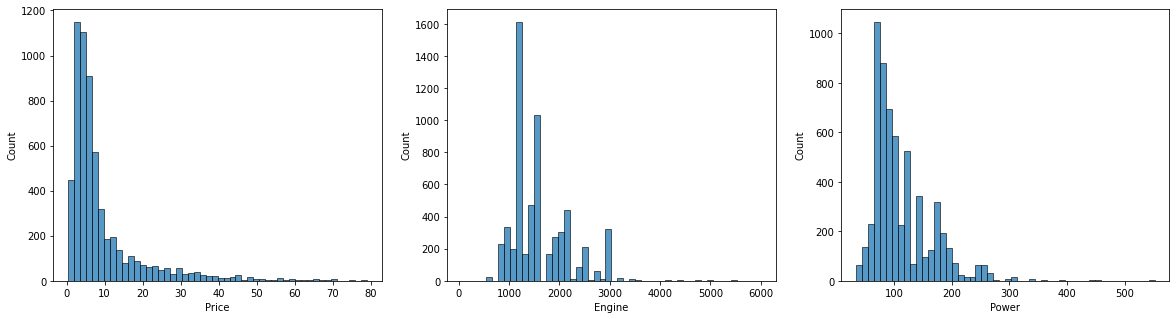

In [ ]:
fig, ax_list = plt.subplots(1,3, figsize=(20,5))
for num, col in enumerate(df[['Price', 'Engine', 'Power']].columns):
    sns.histplot(x=df[col], bins=50, ax=ax_list[num])

The distribution of 'Price', 'Engine', and 'Power' values after applying the transformation:

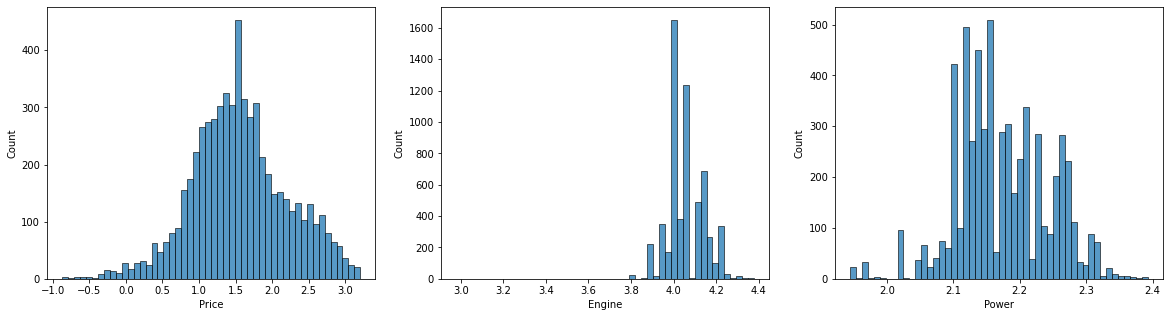

In [ ]:
lmbda_list = list()
skew_list = list()
fig, ax_list = plt.subplots(1,3, figsize=(20,5))

for num, col in enumerate(['Price', 'Engine', 'Power']):
    tran_col, lmbda = stats.boxcox(df[col])
    df[col] = tran_col
    lmbda_list.append(lmbda) 
    sns.histplot(x=df[col], bins=50, ax=ax_list[num])
    skew_list.append(pd.Series(tran_col).skew())

In [ ]:
print(f"The unbaiased skew after performing the transformation:\n{df[['Price',  'Engine', 'Power']].skew()}")

The unbaiased skew after performing the transformation:
Price    -0.003436
Engine   -0.048066
Power     0.002390
dtype: float64


In [ ]:
df.head()

,index,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Price,Mileage,Engine,Power
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,CNG/LPG,Manual,First,0.536835,19.416058,3.940851,2.070048
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,Diesel,Manual,First,2.103447,19.670000,4.067410,2.213408
2,2,Honda Jazz V,Chennai,2011,Petrol,Manual,First,1.346895,18.200000,3.992527,2.153354
3,3,Maruti Ertiga VDI,Chennai,2012,Diesel,Manual,First,1.571748,20.770000,4.003581,2.153477
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,Diesel,Automatic,Second,2.337219,15.200000,4.123799,2.230475


Now that we have a nice, filtered dataset, lets generate visuals to better understand the target and feature target relationships.

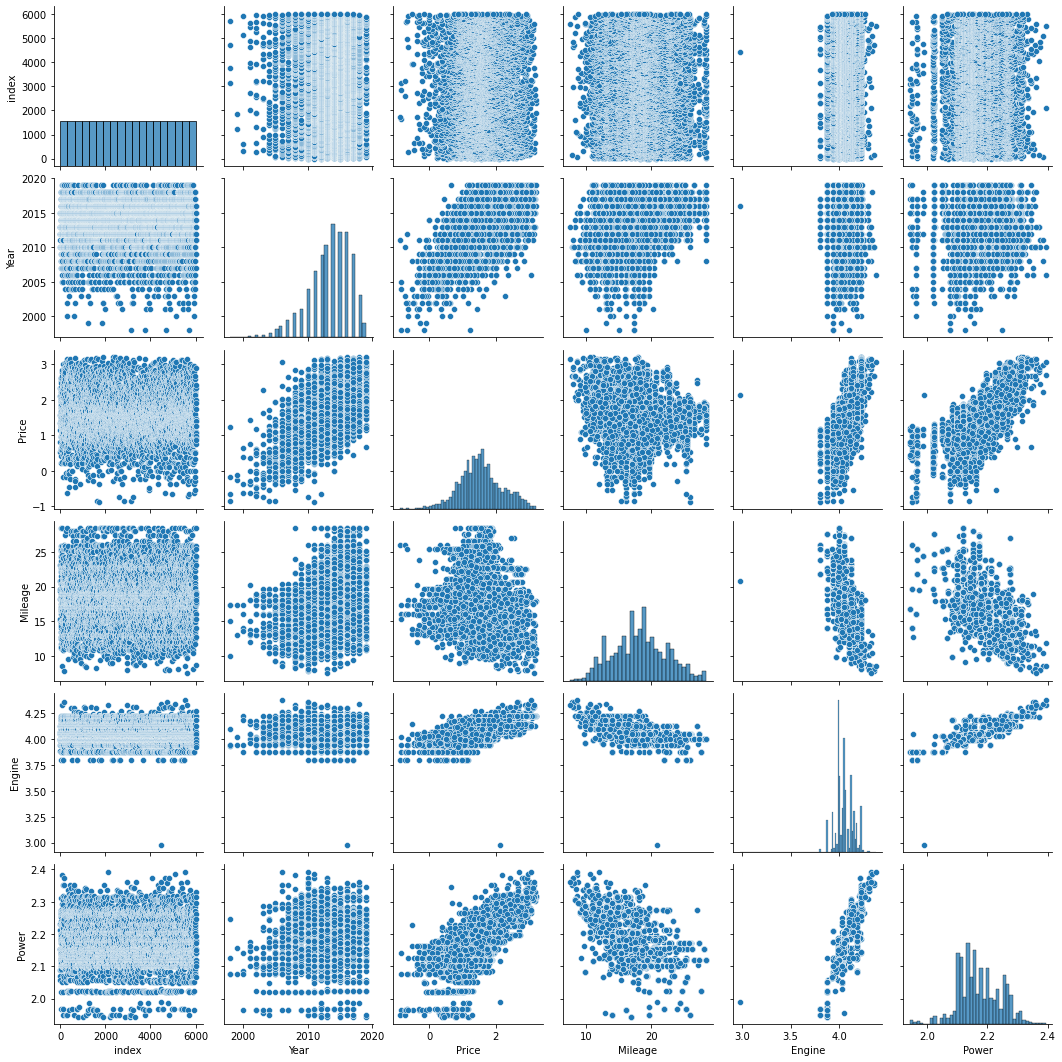

In [ ]:
sns.pairplot(df)

## Feature Encoding

In what follows, we convert categorical variables into dummy/indicator variables.

In [ ]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Transmission', 'Owner_Type'])
df.head()

,index,Name,Location,Year,Price,Mileage,Engine,Power,Fuel_Type_CNG/LPG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Second,Owner_Type_Third & Above
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,0.536835,19.416058,3.940851,2.070048,1,0,0,0,0,1,1,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,2.103447,19.670000,4.067410,2.213408,0,1,0,0,0,1,1,0,0
2,2,Honda Jazz V,Chennai,2011,1.346895,18.200000,3.992527,2.153354,0,0,0,1,0,1,1,0,0
3,3,Maruti Ertiga VDI,Chennai,2012,1.571748,20.770000,4.003581,2.153477,0,1,0,0,0,1,1,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,2.337219,15.200000,4.123799,2.230475,0,1,0,0,1,0,0,1,0


## New Feature

As we mentioned earlier, we dropped the 'New_Price' since most of the related values in our dataset were missed. Here, we consider introducing another feature which seems to turn out a suitable feature for the price prediction. We calculate the deviation of a rows's price from the mean value of the same cars built at the same year as follows: 

In [ ]:
mean_price = df.groupby(['Name', 'Year'])['Price'].transform(lambda x: x.mean())
std_price = df.groupby(['Name', 'Year'])['Price'].transform(lambda x: x.std())
df['Price_Dev'] = (df['Price'] - mean_price) / std_price 

# For some cars in our dataset, there exists just one sample
# For about 1/3 of the cars in the dataset there exist just one sample; 
# therefore we assign zero for those cars in the 'Price_Dev'.
df['Price_Dev'].fillna(0.00, inplace=True)

## Feature Scaling

Finally, we can standardize features by removing the mean and scaling to unit variance using StandardScaler from Sklearn. 

In [ ]:
scaler = StandardScaler(copy=False)
scaler.fit(df[['Price','Mileage','Engine','Power']])
df[['Price','Mileage','Engine','Power']] = scaler.transform(df[['Price','Mileage','Engine','Power']])

The final cleaned and ready-to-use dataset is obtained as follows:

In [ ]:
df

,index,Name,Location,Year,Price,Mileage,Engine,Power,Fuel_Type_CNG/LPG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Second,Owner_Type_Third & Above,Price_Dev
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,-1.554942,0.280070,-1.276636,-1.490651,1,0,0,0,0,1,1,0,0,0.000000
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,0.845500,0.342429,0.140359,0.569082,0,1,0,0,0,1,1,0,0,1.190097
2,2,Honda Jazz V,Chennai,2011,-0.313727,-0.018551,-0.698054,-0.293755,0,0,0,1,0,1,1,0,0,0.000000
3,3,Maruti Ertiga VDI,Chennai,2012,0.030804,0.612550,-0.574291,-0.291987,0,1,0,0,0,1,1,0,0,0.293599
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,1.203697,-0.755246,0.771706,0.814288,0,1,0,0,1,0,0,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,6014,Maruti Swift VDI,Delhi,2014,-0.247839,2.486210,-0.574291,-0.784185,0,1,0,0,0,1,1,0,0,0.048526
6006,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,-0.459119,1.503951,-0.910733,-0.901016,0,1,0,0,0,1,1,0,0,-0.707107
6007,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,-0.869377,-1.049924,1.433372,0.289827,0,1,0,0,0,1,0,1,0,0.000000
6008,6017,Maruti Wagon R VXI,Kolkata,2013,-0.987973,0.153344,-1.276636,-1.063498,0,0,0,1,0,1,1,0,0,-0.688456


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6010 entries, 0 to 6009
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     6010 non-null   int64  
 1   Name                      6010 non-null   object 
 2   Location                  6010 non-null   object 
 3   Year                      6010 non-null   int64  
 4   Price                     6010 non-null   float64
 5   Mileage                   6010 non-null   float64
 6   Engine                    6010 non-null   float64
 7   Power                     6010 non-null   float64
 8   Fuel_Type_CNG/LPG         6010 non-null   uint8  
 9   Fuel_Type_Diesel          6010 non-null   uint8  
 10  Fuel_Type_Electric        6010 non-null   uint8  
 11  Fuel_Type_Petrol          6010 non-null   uint8  
 12  Transmission_Automatic    6010 non-null   uint8  
 13  Transmission_Manual       6010 non-null   uint8  
 14  Owner_Ty